The Hadamard Test is a fundamental quantum algorithm used to determine the expectation value of a unitary operator with respect to a quantum state. This algorithm provides insight into how quantum transformations affect states and is critical in areas such as quantum computing and quantum information.

**How the Hadamard Test Works**

Here are the steps involved in the Hadamard Test:

# [Hadamard Test Tutorial](https://github.com/TannerTorrey3/classiq-library/blob/e0b7cc1e5b91700c0d73c011914db01ebd6b8de8/tutorials/technology_demonstrations/hadamard_test/hadamard_test.ipynb)

[Lecture](https://www.youtube.com/watch?v=utONREgz6qA&list=PL_wGNAk5B0pXq98BJBKsbNH2Qjp1lk8dG&index=25)

![Lecture](./images/Lecture.png)

This tutorial will guide you through the understanding and implementation of the Hadamard Test in quantum computing. We'll explore why the Hadamard Test is important, delve into its applications, and provide Python code snippets for practical understanding.

## Introduction to the Hadamard Test

The Hadamard Test is a significant quantum algorithm used to measure the real and imaginary parts of the expectation value of a unitary operator. This is pivotal in quantum computing for various applications, including quantum algorithm validation, phase estimation, and more.

### Why is the Hadamard Test Important?

The Hadamard Test is crucial for several reasons:

1. **Phase Estimation:** It helps in estimating the phase (angle) that a quantum state acquires after a unitary transformation, which is vital for algorithms like Shor's algorithm.
2. **Quantum Algorithm Validation:** It provides a way to verify the correctness of quantum algorithms by measuring their output states.
3. **General Quantum Measurements:** The test enables the measurement of complex quantities that are otherwise difficult to obtain directly using standard quantum computational methods.

## Applications of the Hadamard Test

The Hadamard Test finds applications in various fields of quantum computing:

- **Quantum Algorithm Development:** It's used in the development and debugging of quantum algorithms.
- **Quantum Chemistry:** In simulating molecular systems, it helps in measuring the expectation values of Hamiltonians.
- **Quantum Machine Learning:** It's used in quantum machine learning algorithms to estimate gradients and other quantities.

---

## Experimenting with the Hadamard Test



In [4]:
from classiq import *
import numpy as np

## Implementing Hadamard Test


### Objective
Find the expectation value of $\langle\psi|U|\psi\rangle$, using a quantum function `hadamard_test_r`. Find the expectation value of $\langle\psi|U\psi\rangle$'s imaginary part using `hadamard_test_i`.

### Process Overview

#### Step 1: Initialize $|\psi\rangle$

- **Random State Creation**: Generate a random amplitude for $|\psi\rangle$.
- **Quantum State Preparation**: Utilize `prepare_amplitudes` from the Classiq SDK to initialize the quantum state of the $\psi$ qubit based on the amplitude.

### Implementation Details

Generate an array of random numbers within the range [-1, 1]. The array size equals the number of possible superposition states for `NUM_QUBITS`, aligning with the quantum system's complexity. Since we are only using one qubit, we will generate an array of size two ($2^1$).

In [5]:
np.random.seed(18)

NUM_QUBITS = 1
amps1 = 1 - 2 * np.random.rand(2**NUM_QUBITS)
amps1 = amps1 / np.linalg.norm(amps1)
print(amps1)

[-0.99934306 -0.03624152]


#### Step 2: Create a Quantum Function for the Real Expectation Value
The steps for a hadamard test are as follows:
- Apply a hadamard to the ancilla qubit
- Apply a controlled unitary operation with the ancilla qubit as the control and $|\psi\rangle$ as the target. In our case, the controlled unitary operation is the controlled-not(CX) gate.
- Apply a hadamard to the ancilla qubit
- Measure the ancilla 

Notice how `hadamard_test_r` implements the steps above in readable and concise manner.

In [7]:
@qfunc
def hadamard_test_r(psi: QBit, ancilla:Output[QBit]):
    allocate(out=ancilla,num_qubits=1)
    hadamard_transform(ancilla)
    CX(ancilla,psi)
    hadamard_transform(ancilla)

In [8]:
@qfunc
def main(ancilla_real:Output[QBit]):
    psi = QBit("state1")
    prepare_amplitudes(amps1.tolist(), 0.0, psi)
    hadamard_test_r(psi, ancilla_real)

qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)

Opening: https://platform.classiq.io/circuit/6a28ecba-aa95-4f77-b4bb-a0e445ca0b0a?version=0.43.0


![circuit](./images/Hadamard_1.png)

With the quantum program created, we can now calculate the expectation value using the following formula:
$E=P(0)−P(1)$

Where $P(0)$ and $P(1)$ are the probabilities of measuring the qubit in state ∣0 and ∣1⟩, respectively. These probabilities can be computed from the counts dictionary as follows:

$P(0) = \frac{Counts(0)}{Total Counts}$
<br><br>

$P(1) = \frac{Counts(1)}{Total Counts}$


In [9]:
result = execute(qprog).result()

p0 = result[0].value.counts["0"] / sum(result[0].value.counts.values())
p1 = result[0].value.counts["1"] / sum(result[0].value.counts.values())
expectation = p0 - p1

print(f"Expectation value from real part: {expectation}")

Expectation value from real part: 0.044921875


#### Step 2: Create a Quantum Function for the Imaginary Expectation Value
The steps for a hadamard test are as follows:
- Apply a hadamard to the ancilla qubit
- Apply a phase shift of $\frac{\pi}{2}$ to the ancilla qubit
- Apply a controlled unitary operation with the ancilla qubit as the control and $|\psi\rangle$ as the target. In our case, the controlled unitary operation is the controlled-not(CX) gate.
- Apply a hadamard to the ancilla qubit
- Measure the ancilla 

Notice how `hadamard_test_i` implements the steps above in a readable and concise manner.

In [10]:
@qfunc
def hadamard_test_i(psi: QBit, ancilla:Output[QBit]):
    allocate(out=ancilla,num_qubits=1)
    hadamard_transform(ancilla)
    RZ(np.pi/2,ancilla)
    CX(ancilla,psi)
    hadamard_transform(ancilla)

### Step 3: Putting it All Together
- Prepare $|\psi\rangle$.
- Use use `hadamard_test_i` to find the expectation value for imaginary parts.

In [12]:
@qfunc
def main(ancilla_imag:Output[QBit]):
    psi = QBit("state1")
    prepare_amplitudes(amps1.tolist(), 0.0, psi)
    hadamard_test_i(psi, ancilla_imag)

qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)

Opening: https://platform.classiq.io/circuit/2af3a40a-aca3-4fa5-979a-7a39140b258c?version=0.43.0


![circuit](./images/Hadamard_2.png)

Once again we will calculate the expectation value using the following formula:
<br><br>
$E=P(0)−P(1)$


In [13]:
result = execute(qprog).result()

p0 = result[0].value.counts["0"] / sum(result[0].value.counts.values())
p1 = result[0].value.counts["1"] / sum(result[0].value.counts.values())
expectation = p0 - p1

print(f"Expectation value from imaginary part: {expectation}")

Expectation value from imaginary part: -0.0087890625


### Example 2: 

We wil now use the Hadamard-Test to create the notorious Swap-Test. Swap-Test compares two quantum states, $|\psi\rangle$ and $|\phi\rangle$. The Swap-Test is the same as the Hadamard test for real parts, except it uses a bit-wise controlled Swap Gate as the controlled unitary operator. For Swap-Test the control qubit will be the ancilla and the targets will be $\psi$ and $\phi$.

In [24]:
@qfunc
def bit_wise_swap(psi: QArray[QBit], phi: QArray[QBit]):
    repeat(psi.len(), lambda i: SWAP(psi[i],phi[i]))

def perform_bit_wise_swap(psi, phi):
    bit_wise_swap(psi, phi)
@qfunc
def local_swap_test(ancilla:Output[QBit], psi: QArray[QBit], phi: QArray[QBit]):
    allocate(1,ancilla)
    H(ancilla)
    control(perform_bit_wise_swap,ancilla, psi,phi)
    H(ancilla)

Now we generate two random arrays to initialize psi and phi. This will provide us will two different states to compare using our local swap test. Notice how difficult implementing swap test at a gate level is, thankfully we have Classiq's built-in `swap_test` function.

In [27]:
from classiq.execution import ExecutionPreferences
@qfunc
def main(ancilla:Output[QBit]):
    psi_state = [0,0.333,0.333,0.334]
    phi_state = [0.334,0.333,0.333,0]

    psi = QArray('psi')
    phi = QArray('phi')
    prepare_state(probabilities=psi_state, bound=1e-4, out=psi)
    prepare_state(probabilities=phi_state, bound=1e-4, out=phi)
    local_swap_test(ancilla,psi, phi)

qmod = create_model(main)
qmod = set_execution_preferences(
    qmod, execution_preferences=ExecutionPreferences(num_shots=100_000)
)

TypeError: control() takes 2 positional arguments but 4 were given

In [ ]:
result = execute(qprog).result()

state_overlap = np.sqrt(
    2 * result[0].value.counts["0"] / sum(result[0].value.counts.values()) - 1
)

print(f"States overlap from Swap-Test result: {state_overlap}")


Follow the implementation in class and code in the IDE the Hadamard test for calculating the (real part of the) expectation value of the QFT unitary at the state |0> with 4 qubits.  Execute the algorithm from the IDE with 1,000 shots, and calculate the (real part of the) expectation value using the formula $Re{\Braket{0| U_{QFT}|0}} = 2P_0-1$
. Is it what you expected it to be?

In [49]:
from classiq.execution import ExecutionPreferences
@qfunc
def main(expectation_value:Output[QBit]):
    allocate(1,expectation_value)
    psi = QArray("psi")
    allocate(4,psi)
    #prepare_state(probabilities=[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], bound=0.0, out=psi)
    hadamard_transform(expectation_value)
    control(expectation_value,lambda: qft(psi))
    hadamard_transform(expectation_value)

qmod = create_model(main)
qmod = set_execution_preferences(
    qmod, execution_preferences=ExecutionPreferences(num_shots=2000)
)
qprog = synthesize(qmod)
show(qprog)

Opening: https://platform.classiq.io/circuit/c2c9349c-606e-4cf3-bf76-9031b89c07bd?version=0.43.0


In [50]:
result = execute(qprog).result()
p0 = result[0].value.counts["0"] / sum(result[0].value.counts.values())
expectation = 2*p0-1
print(f"Expectation value from real part: {expectation}")

Expectation value from real part: 0.278


In [44]:
def run_hadamard_test(shots):

    @qfunc
    def main(expectation_value: Output[QBit]):
        allocate(1, expectation_value)
        psi = QArray("psi")
        allocate(4, psi)
        hadamard_transform(expectation_value)
        control(expectation_value, lambda: qft(psi))
        hadamard_transform(expectation_value)

    ### run model
    qmod = create_model(main)
    qmod = set_execution_preferences(
    qmod, execution_preferences=ExecutionPreferences(num_shots=shots))
    qprog = synthesize(qmod)
    result = execute(qprog).result()

    ## expectation value
    p0 = result[0].value.counts["0"] / sum(result[0].value.counts.values())
    expectation = 2 * p0 - 1
    return expectation

In [55]:
results

[0.264,
 0.2410000000000001,
 0.274,
 0.2490000000000001,
 0.242375,
 0.2563333333333333]

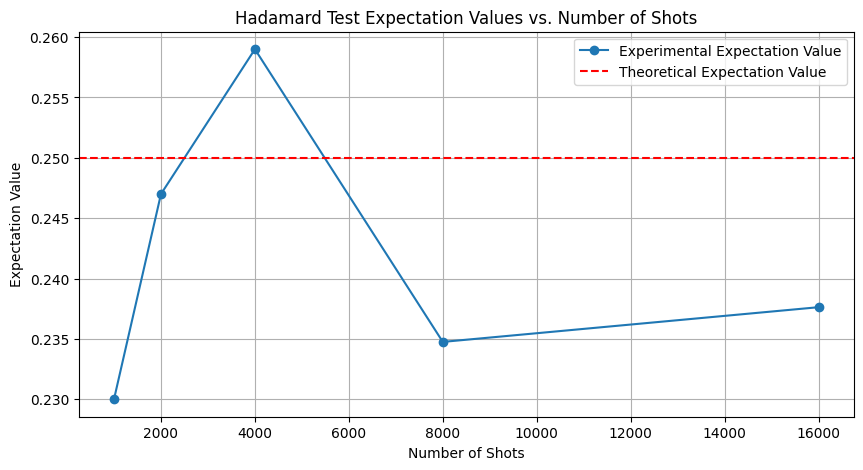

In [56]:
import matplotlib.pyplot as plt

shots_list = [1000, 2000, 4000, 8000, 16000]
results = [run_hadamard_test(shots) for shots in shots_list]
theoretical_value = 0.25
# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(shots_list, results, 'o-', label='Experimental Expectation Value')
plt.axhline(y=theoretical_value, color='r', linestyle='--', label='Theoretical Expectation Value')
plt.xlabel('Number of Shots')
plt.ylabel('Expectation Value')
plt.title('Hadamard Test Expectation Values vs. Number of Shots')
plt.legend()
plt.grid(True)
plt.show()

---

## Conclusion

The Hadamard Test is a foundational tool in quantum computing for measuring the expectation values of unitary operators. Through this tutorial, you've learned its importance, applications, and implementation using Qiskit. Experimenting with different unitary operators and quantum circuits can deepen your understanding of quantum computing principles.

### The Classiq Platform: Empowering Quantum Innovation

The Classiq platform has emerged as an indispensable tool in the quantum computing industry. Its strength and importance lie in demystifying quantum programming, offering an accessible yet powerful avenue for users to design, prototype, and analyze quantum algorithms with ease. Classiq's user-friendly interface and advanced features bridge the gap between complex quantum theories and practical applications, enabling both beginners and seasoned experts to unlock quantum computing's vast potential. Through facilitating the design of sophisticated quantum functions, as demonstrated with our quadratic examples, Classiq accelerates the development of quantum applications, positioning itself as a catalyst for breakthroughs in computational power and innovation.

---

## Thank You!
#### Make sure to checkout the classiq platform here: https://platform.classiq.io